In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

Many U.S. workers are paid on the 1st and 15th of the month. When they receive their paycheck, a portion of their paycheck is invested for retirement automatically if they are enrolled in some sort of retirement plan (ie. 401k). The retirement funds invest this money usually the following day. So theoretically, buying equities on the 2nd and 16th of the month could offer some positive, uncorrelated return.

In [36]:
#don't re run this too much or yahoo finance will block you

tickers = ["SPY"] 

start_date = "1995-01-01"
end_date = "2023-06-02"

data = yf.download(tickers, start=start_date, end=end_date)
print(data)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1995-01-03   45.703125   45.843750   45.687500   45.781250   27.157167   
1995-01-04   45.984375   46.000000   45.750000   46.000000   27.286936   
1995-01-05   46.031250   46.109375   45.953125   46.000000   27.286936   
1995-01-06   46.093750   46.250000   45.906250   46.046875   27.314745   
1995-01-09   46.031250   46.093750   46.000000   46.093750   27.342550   
...                ...         ...         ...         ...         ...   
2023-05-25  414.739990  416.160004  412.410004  414.649994  408.731110   
2023-05-26  415.329987  420.769989  415.250000  420.019989  414.024445   
2023-05-30  422.029999  422.579987  418.739990  420.179993  414.182159   
2023-05-31  418.279999  419.220001  416.220001  417.850006  411.885437   
2023-06-01  418.089996  422.920013  416.790

In [37]:
#reformat dataframe so we can use the date data in the index
data = data.reset_index()
data["Day"] = data["Date"].dt.day
data["Weekday"] = data["Date"].dt.weekday

The stratey: buy the SP500 at open and sell on close on the 2nd and 16th of the month. Excluding Friday, for some reason Friday hurts returns a lot.

In [40]:
cash_balance = 100000
portfolio_value = []

for day, weekday, open, close in zip(data["Day"], data["Weekday"], data["Open"], data["Close"]):
    if (day == 2 or day == 16) and weekday != 4:
        cash_balance = cash_balance * close/open
    portfolio_value.append(cash_balance)
    
data["Portfolio Balance"] = portfolio_value

See below for backtest graph. I have found that if you exclude Fridays, total return is closer to 80% rather than the 60% if you include all days of 2nd and 16th. 

Questions:
- how much return is attributable to each day under various conditions (like trading/not trading Fridays)?
- any months that are consistently bad?
- how holidays/news announcements impact this (like fed rate hikes or something)?
- Recession underperformance (2000 & 2010), maybe cause people lose confidence in investing?
- are there other days when not to trade or should trade?

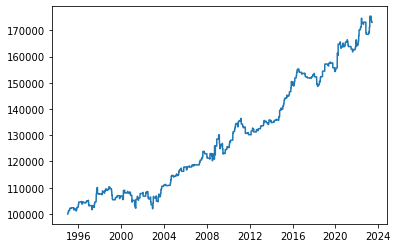

In [41]:
plt.plot(data["Date"],data["Portfolio Balance"])
plt.show()